In [2]:
# importing packages
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

[*********************100%%**********************]  1 of 1 completed

Buy and Hold Strategy Return and Risk: -5.62% and 29.02%
MACD Return and Risk: 12.8% and 29.1%


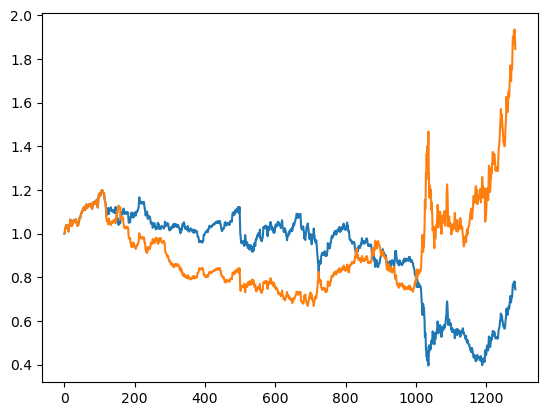

In [8]:
# Downloading stock data
stock = 'XOM'
data = yf.download(stock, '2016-01-01', '2021-03-17')

# specifying strategy parameters
short_ma = 12
long_ma = 26
fee = 0.002

# Coding technical analysis signals
data['MA' + str(short_ma)] = data['Close'].rolling(short_ma).mean()
data['MA' + str(long_ma)] = data['Close'].rolling(long_ma).mean()
data['return'] = data['Close'].pct_change()

# Simulating trading strategies
start = long_ma
data['signal'] = 2*(data['MA' + str(short_ma)] > data['MA' + str(long_ma)]) - 1
BnH_return = np.array(data['return'][start+1:])
MACD_return = np.array(data['return'][start+1:])*np.array(data['signal'][start:-1])-fee*abs(np.array(data['signal'][start+1:])-np.array(data['signal'][start:-1]))
BnH = np.prod(1+BnH_return)**(252/len(BnH_return)) - 1
MACD = np.prod(1+MACD_return)**(252/len(MACD_return)) - 1
BnH_risk = np.std(BnH_return)*(252)**(1/2)
MACD_risk = np.std(MACD_return)*(252)**(1/2)

# Visualizing the results
print("Buy and Hold Strategy Return and Risk: " + str(round(BnH*100, 2))+'% and '+str(round(BnH_risk*100, 2))+'%')
print("MACD Return and Risk: " + str(round(MACD*100, 2))+'% and '+str(round(MACD_risk*100, 2))+'%')
plt.plot(np.append(1, np.cumprod(1+BnH_return)))
plt.plot(np.append(1, np.cumprod(1+MACD_return)))